## Exploring the CoralHydro2k Seawater database with Python tools
### This script plots the global distribution of the Coral Hydro2k Seawater Database points at:
- The surface (above 5m), subsurface (below 5m), as well as datasets with evaporation flags and/or additional salinity data

## 1. Accessing the data

The database is available as a csv file from .........

#### Important information - 
- You will get an error that says "DtypeWarning: Columns (9,10,13,16,20,34,55) have mixed types."
- This is because those columns have a mixture of strings and NaN values. This is okay and will not affect plotting the data. 

In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import numpy as np

In [2]:
# specify location of data
# home = '~/Downloads/'
home = '/Users/jessicahargreaves/Documents/CH2k_seawater/'

# load in database
seawater_database = pd.read_csv(home + 'CoralHydro2k_Seawater_1_0_0.csv') 
# seawater_database = pd.read_csv(home + 'CoralHydro2k_Seawaterd18O.csv')  

/var/folders/gq/rg5drn3x26b05hwsnr_gljy40000gp/T/ipykernel_86495/558236230.py:6: DtypeWarning: Columns (9,12,15,19,32) have mixed types. Specify dtype option on import or set low_memory=False.
  seawater_database = pd.read_csv(home + 'CoralHydro2k_Seawater_1_0_0.csv')


### Exploring the data base 
- this is done with basic pandas explore tools - you can read more about that here - https://pandas.pydata.org/docs/user_guide/index.html

In [3]:
# check out all of the database columns
seawater_database.columns

Index(['CoralHydro2k ID', 'Site name or geographic area\n\n', 'Location type',
       'Location description', 'Collection year', 'Collection month',
       'Collection day', 'Collection time (UTC; 24-hr; hh:mm:ss.sss)',
       'Collection date notes', 'Water isotope analysis date',
       'Latitude (decimal degrees N)', 'Longitude (decimal degrees E)',
       'Location notes', 'Depth', 'Depth units', 'Depth notes', 'd18O value',
       'd18O units', 'd18O correction', 'd18O correction notes',
       'Evaporation flag', 'd18O error', 'd18O error units',
       'd18O error notes', 'Reference standard', 'Sample ID',
       'd18O analysis technique', 'd18O analysis location',
       'Publication Citation', 'Publication DOI or URL', 'Dataset citation',
       'Dataset URL', 'Dataset ID', 'Access date', 'Data provenance notes',
       'Cruise (y/n)', 'Cruise ID', 'Station ID', 'Cruise report',
       'Cruise report URL',
       'Sample collection, processing, and storage notes ',
       'Wat

#### Basic commands
- You can set up the inputs how you would like, however one basic design is to convert all the dates into an easy-to-use format like datetime. Here we convert the columns into Y-M-D format

In [4]:
# combine year, month, day columns of database
all_years = seawater_database['Collection year']
all_months = seawater_database['Collection month']
all_days = seawater_database['Collection day']
date_dataframe = pd.DataFrame({'year':all_years,'month':all_months,'day':all_days})
all_dates = pd.to_datetime(date_dataframe, format='%Y-%M-%D')

# add new 'Date' column to seawater database
seawater_database['CollectionDate'] = all_dates

all_times = seawater_database['Collection time (UTC; 24-hr; hh:mm:ss.sss)']

#print out the database
seawater_database

,CoralHydro2k ID,Site name or geographic area\n\n,Location type,Location description,Collection year,Collection month,Collection day,Collection time (UTC; 24-hr; hh:mm:ss.sss),Collection date notes,Water isotope analysis date,...,d2H units,d2H error,Temperature value,Temperature units,Temperature error,Salinity value,Salinity units,Salinity error,Temperature/salinity notes,CollectionDate
0,AC13BB0001,Bay of Bengal,bay,"""The BOB is a unique ocean basin influenced by...",2008,8,19.0,NaN,NaN,NaN,...,per mille,1.0,NaN,NaN,NaN,34.46,PSU,0.1,"Water temperature, dissolved oxygen, salinity,...",2008-08-19
1,AC13BB0002,Bay of Bengal,bay,"""The BOB is a unique ocean basin influenced by...",2008,8,19.0,NaN,NaN,NaN,...,per mille,1.0,NaN,NaN,NaN,34.48,PSU,0.1,"Water temperature, dissolved oxygen, salinity,...",2008-08-19
2,AC13BB0003,Bay of Bengal,bay,"""The BOB is a unique ocean basin influenced by...",2008,8,18.0,NaN,NaN,NaN,...,per mille,1.0,NaN,NaN,NaN,34.59,PSU,0.1,"Water temperature, dissolved oxygen, salinity,...",2008-08-18
3,AC13BB0004,Bay of Bengal,bay,"""The BOB is a unique ocean basin influenced by...",2008,8,15.0,NaN,NaN,NaN,...,per mille,1.0,NaN,NaN,NaN,34.62,PSU,0.1,"Water temperature, dissolved oxygen, salinity,...",2008-08-15
4,AC13BB0005,Bay of Bengal,bay,"""The BOB is a unique ocean basin influenced by...",2008,8,15.0,NaN,NaN,NaN,...,per mille,1.0,NaN,NaN,NaN,34.62,PSU,0.1,"Water temperature, dissolved oxygen, salinity,...",2008-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18593,ZI08MA0021,"Mayotte, Comoro Archipelago",lagoon,"Lagoon, but a very deep lagoon (20-80m). δ18Os...",2005,1,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-30
18594,ZI08MA0022,"Mayotte, Comoro Archipelago",lagoon,"Lagoon, but a very deep lagoon (20-80m). δ18Os...",2005,1,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-15
18595,ZI08MA0023,"Mayotte, Comoro Archipelago",lagoon,"Lagoon, but a very deep lagoon (20-80m). δ18Os...",2004,10,31.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-10-31
18596,ZI08MA0024,"Mayotte, Comoro Archipelago",lagoon,"Lagoon, but a very deep lagoon (20-80m). δ18Os...",2004,10,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-10-17


### 2. Plot the data 
- Here we will plot different aspects of the database; 
    - the d18Osw datapoints
    - data that has evaporation flags
    - Salinity data
    - d2H data 
    - and the date of collection. 
    
There are many ways to execute this however we have renamed the dataframes to make it easier. 

#### Plot d18O datapoints (this is all the data available in the database)
- You can change this to scan for different depths if you would like, below there are options to look at data above and below 5m if needed.

Text(0.5, 1.0, '$δ^{18}$$O_{sw}$ (all depths)')

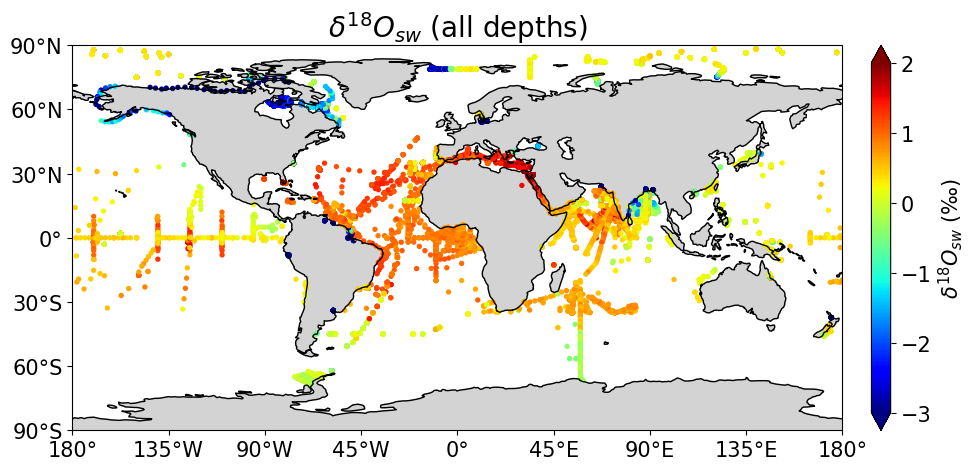

In [5]:
# Choose a set of depths to plot
df_all = seawater_database   # all depths
#df_all = seawater_database[seawater_database['Depth']<=5]  # upper 5m
#df_all = seawater_database[seawater_database['Depth']>5]  # below 5m

# Rename columns
df_all = df_all.rename(columns={"Collection year": "yr", "Collection month": "mo",
                   "Latitude (decimal degrees N)": "lat", 
                   "Longitude (decimal degrees E)": "lon", "Depth": "depth",
                   "d18O value": "d18O", 
                   "Publication Citation": "pubcit", "First Author": "firstauth", "Publication Year": "pubyr", 
                   "Site name or geographic area\n\n": "site"})

all_lats = df_all['lat']
all_lons = df_all['lon']
all_depths = df_all['depth']
all_d18o = df_all['d18O']

fig1, ax1 = plt.subplots(figsize=(15,5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})
ax1.set_global()
ax1.coastlines()
ax1.add_feature(cfeature.LAND, color='lightgrey')
ax1.set_xticks([-180,-135,-90,-45,0,45,90,135,180])
ax1.set_yticks([-90,-60,-30,0,30,60,90])
ax1.tick_params(labelsize=15)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
# scatterplot where color of marker is based on d18O value, d18O values range from -3 to 2 per mille
all_plot = ax1.scatter(all_lons, all_lats, c=all_d18o, s=8, vmin=-3, vmax=2, cmap='jet', transform=ccrs.PlateCarree())
ax1_cbar = plt.colorbar(all_plot, extend='both', pad =0.025)
ax1_cbar.set_label('$δ^{18}$$O_{sw}$ (‰)', fontsize=15)
ax1_cbar.ax.tick_params(labelsize=15)

plt.title('$δ^{18}$$O_{sw}$ (all depths)', fontsize=20)
#plt.title('Surface $δ^{18}$$O_{sw}$ (Upper 5m)', fontsize=20)
#plt.title('$δ^{18}$$O_{sw}$ (>5m depth)', fontsize=20)

#### Plot d18O datapoints that have evaporation flags
- This code takes all the data (df_all), and then select the data with a Y flag in the evaporation flag column.
- evaporation flag data is that which has a evaporation flag in the original database

Text(0.5, 1.0, '$δ^{18}$$O_{sw}$ with Evaporation Flag')

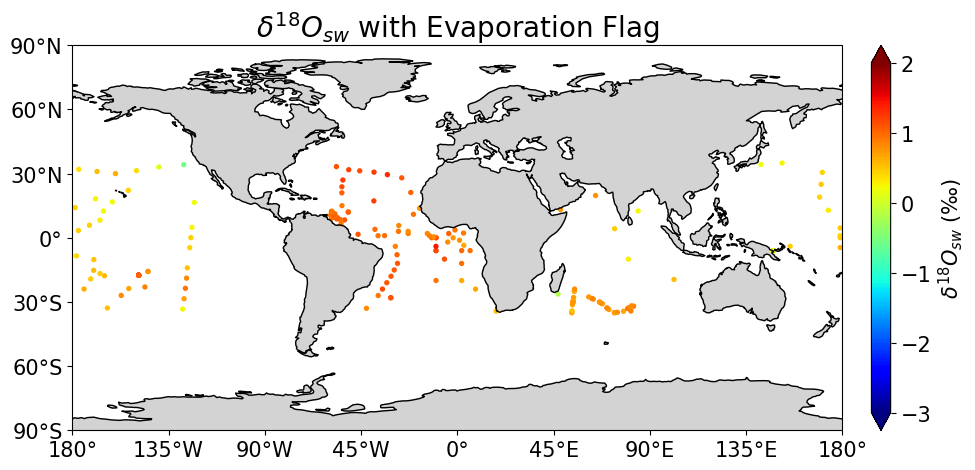

In [6]:
# Choose a set of depths to plot
df_all = seawater_database                                           # all depths
#df_all = seawater_database[seawater_database['Depth']<=5]  # upper 5m
#df_all = seawater_database[seawater_database['Depth']>5]  # below 5m

# Select only data with evaporation flag
df_flags = df_all[df_all['Evaporation flag']=='Y']

# Rename columns
df_flags = df_flags.rename(columns={"Collection year": "yr", "Collection month": "mo",
                   "Latitude (decimal degrees N)": "lat", 
                   "Longitude (decimal degrees E)": "lon", "Depth": "depth",
                   "d18O value": "d18O", 
                   "Publication Citation": "pubcit", "First Author": "firstauth", "Publication Year": "pubyr", 
                   "Site name or geographic area\n\n": "site"})

flags_lats = df_flags['lat']
flags_lons = df_flags['lon']
flags_depths = df_flags['depth']
flags_d18o = df_flags['d18O']

fig3, ax3 = plt.subplots(figsize=(15,5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})
ax3.set_global()
ax3.coastlines()
ax3.add_feature(cfeature.LAND, color='lightgrey')
ax3.set_xticks([-180,-135,-90,-45,0,45,90,135,180])
ax3.set_yticks([-90,-60,-30,0,30,60,90])
ax3.tick_params(labelsize=15)
ax3.xaxis.set_major_formatter(LongitudeFormatter())
ax3.yaxis.set_major_formatter(LatitudeFormatter())
flags_plot = ax3.scatter(flags_lons, flags_lats, c=flags_d18o, s=8, vmin=-3, vmax=2, cmap='jet', transform=ccrs.PlateCarree())
ax3_cbar = plt.colorbar(flags_plot, extend='both', pad =0.025)
ax3_cbar.set_label('$δ^{18}$$O_{sw}$ (‰)', fontsize=15)
ax3_cbar.ax.tick_params(labelsize=15)

plt.title('$δ^{18}$$O_{sw}$ with Evaporation Flag', fontsize=20)

#### Plot d18O datapoints that have salinity data
- This code takes all the data (df_all), and then selects the locations where salinity data exists (i.e. notna())

Text(0.5, 1.0, '$δ^{18}$$O_{sw}$ with Salinity Data')

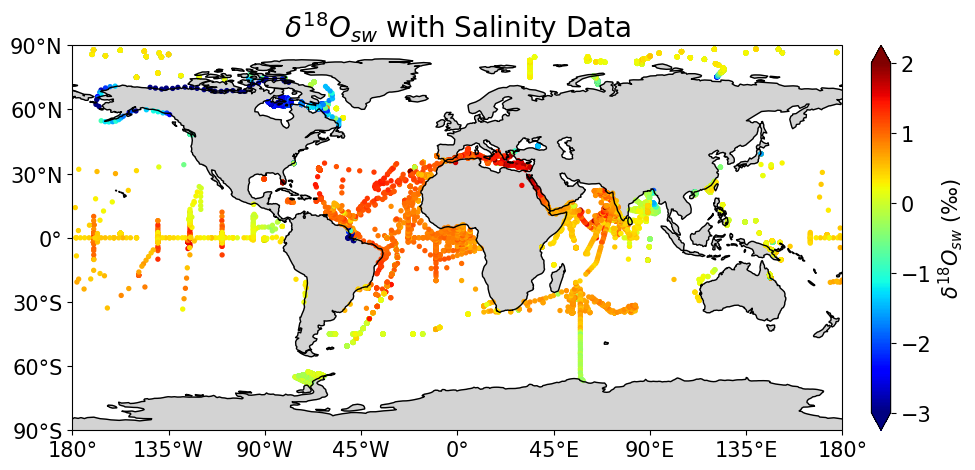

In [7]:
# Choose a set of depths to plot
df_all = seawater_database                                           # all depths
#df_all = seawater_database[seawater_database['Depth']<=5]  # upper 5m
#df_all = seawater_database[seawater_database['Depth']>5]  # below 5m

# Select only data with paired salinity data
df_sal = df_all[df_all['Salinity value'].notna()]

# Rename columns
df_sal = df_sal.rename(columns={"Collection year": "yr", "Collection month": "mo",
                   "Latitude (decimal degrees N)": "lat", 
                   "Longitude (decimal degrees E)": "lon", "Depth": "depth",
                   "d18O value": "d18O", 
                   "Publication Citation": "pubcit", "First Author": "firstauth", "Publication Year": "pubyr", 
                   "Site name or geographic area\n\n": "site"})

sal_lats = df_sal['lat']
sal_lons = df_sal['lon']
sal_depths = df_sal['depth']
sal_d18o = df_sal['d18O']

fig4, ax4 = plt.subplots(figsize=(15,5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})
ax4.set_global()
ax4.coastlines()
ax4.add_feature(cfeature.LAND, color='lightgrey')
ax4.set_xticks([-180,-135,-90,-45,0,45,90,135,180])
ax4.set_yticks([-90,-60,-30,0,30,60,90])
ax4.tick_params(labelsize=15)
ax4.xaxis.set_major_formatter(LongitudeFormatter())
ax4.yaxis.set_major_formatter(LatitudeFormatter())
sal_plot = ax4.scatter(sal_lons, sal_lats, c=sal_d18o, s=8, vmin=-3, vmax=2, cmap='jet', transform=ccrs.PlateCarree())
ax4_cbar = plt.colorbar(sal_plot, extend='both', pad =0.025)
ax4_cbar.set_label('$δ^{18}$$O_{sw}$ (‰)', fontsize=15)
ax4_cbar.ax.tick_params(labelsize=15)

plt.title('$δ^{18}$$O_{sw}$ with Salinity Data', fontsize=20)

#### Plot d18O datapoints that have d2H data
- This code takes all the data (df_all), and then selects locations where d2H data exists (i.e. notna())

9769


Text(0.5, 1.0, '$δ^{18}$$O_{sw}$ with d2H Data')

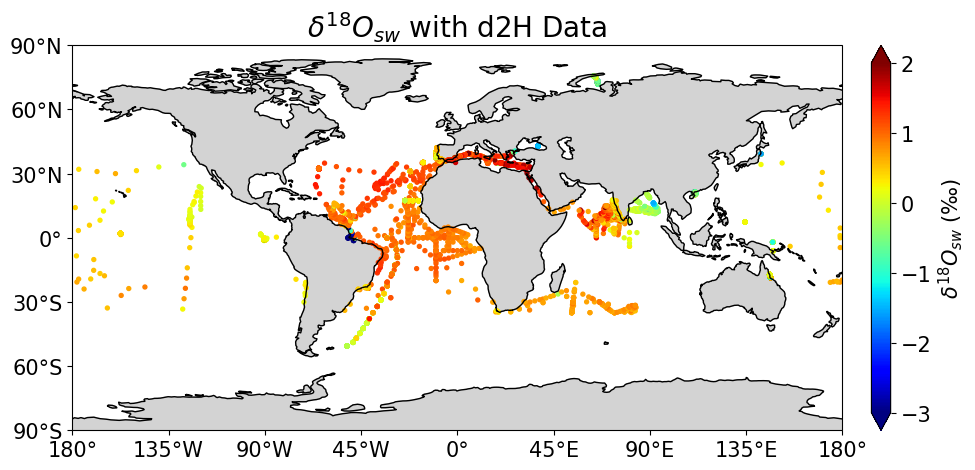

In [8]:
# plot d18O datapoints that have d2H data
seawater_database_d2H = seawater_database[seawater_database['d2H value'].notna()]
d2H_lats = seawater_database_d2H['Latitude (decimal degrees N)']
d2H_lons = seawater_database_d2H['Longitude (decimal degrees E)']
d2H_depths = seawater_database_d2H['Depth']
d2H_d18o = seawater_database_d2H['d18O value']

print(len(d2H_d18o))    # This is the number of hidden data points

fig4, ax4 = plt.subplots(figsize=(15,5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})
ax4.set_global()
ax4.coastlines()
ax4.add_feature(cfeature.LAND, color='lightgrey')
ax4.set_xticks([-180,-135,-90,-45,0,45,90,135,180])
ax4.set_yticks([-90,-60,-30,0,30,60,90])
ax4.tick_params(labelsize=15)
ax4.xaxis.set_major_formatter(LongitudeFormatter())
ax4.yaxis.set_major_formatter(LatitudeFormatter())
d2H_plot = ax4.scatter(d2H_lons, d2H_lats, c=d2H_d18o, s=8, vmin=-3, vmax=2, cmap='jet', transform=ccrs.PlateCarree())
ax4_cbar = plt.colorbar(d2H_plot, extend='both', pad =0.025)
ax4_cbar.set_label('$δ^{18}$$O_{sw}$ (‰)', fontsize=15)
ax4_cbar.ax.tick_params(labelsize=15)
plt.title('$δ^{18}$$O_{sw}$ with d2H Data', fontsize=20)

#### Plot sample collection date of each datapoint
- This code takes all the data (df_all), and then plots the collection date. 

18598


Text(0.5, 1.0, 'Sample collection dates of $δ^{18}$$O_{sw}$')

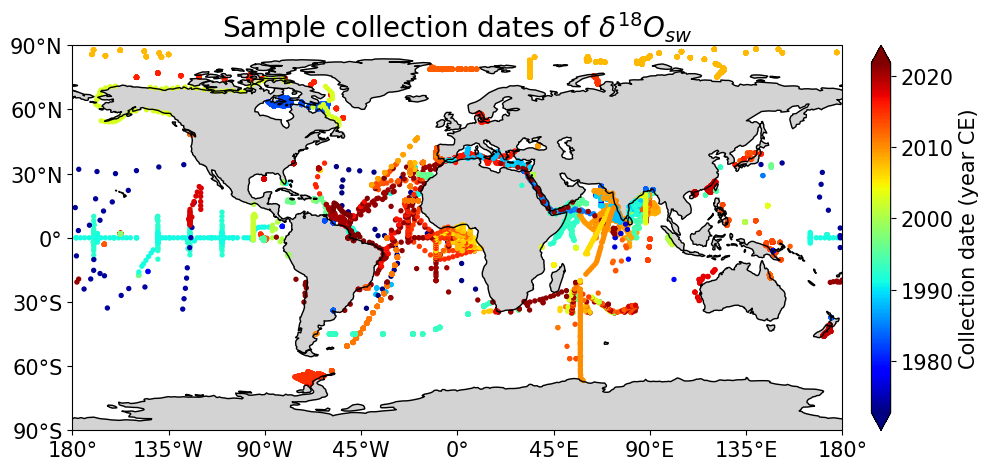

In [9]:
# Plot the sample collection date of each datapoint

# Choose a set of depths to plot
df_all = seawater_database   # all depths
#df_all = seawater_database[seawater_database['Depth']<=5]  # upper 5m
#df_all = seawater_database[seawater_database['Depth']>5]  # below 5m

# Rename columns
df_all = df_all.rename(columns={"Collection year": "yr", "Collection month": "mo",
                   "Latitude (decimal degrees N)": "lat", 
                   "Longitude (decimal degrees E)": "lon", "Depth": "depth",
                   "d18O value": "d18O", 
                   "Publication Citation": "pubcit", "First Author": "firstauth", "Publication Year": "pubyr", 
                   "Site name or geographic area\n\n": "site"})

all_lats = df_all['lat']
all_lons = df_all['lon']
all_depths = df_all['depth']
all_d18o = df_all['d18O']

print(len(all_d18o))    # This is the number of data points

all_years = np.array(df_all["yr"])
all_months = np.array(df_all["mo"])
all_fryr = all_years+all_months/12.  # fractional year

fig1, ax1 = plt.subplots(figsize=(15,5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})
ax1.set_global()
ax1.coastlines()
ax1.add_feature(cfeature.LAND, color='lightgrey')
ax1.set_xticks([-180,-135,-90,-45,0,45,90,135,180])
ax1.set_yticks([-90,-60,-30,0,30,60,90])
ax1.tick_params(labelsize=15)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
# scatterplot where color of marker is based on d18O value, d18O values range from -3 to 2 per mille
all_plot = ax1.scatter(all_lons, all_lats, c=all_fryr, s=8, cmap='jet', transform=ccrs.PlateCarree())
ax1_cbar = plt.colorbar(all_plot, extend='both', pad =0.025)
ax1_cbar.set_label('Collection date (year CE)', fontsize=15)
ax1_cbar.ax.tick_params(labelsize=15)
plt.title('Sample collection dates of $δ^{18}$$O_{sw}$', fontsize=20)